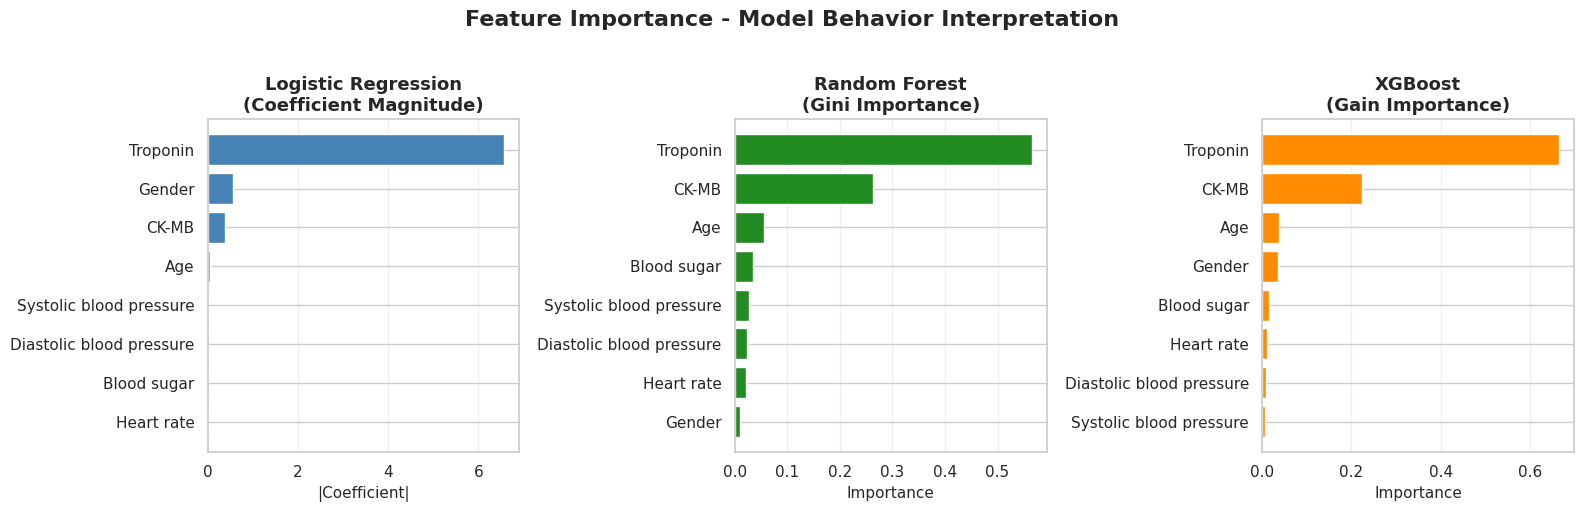


Top 3 Most Important Features:

Logistic Regression:
 Feature  Importance
   CK-MB    0.381692
  Gender    0.557021
Troponin    6.580996

Random Forest:
 Feature  Importance
     Age    0.056320
   CK-MB    0.262993
Troponin    0.565233

XGBoost:
 Feature  Importance
     Age    0.037320
   CK-MB    0.223144
Troponin    0.665440


In [70]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Logistic Regression: Coefficient magnitude
lr_coef = np.abs(logreg.coef_[0])
lr_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': lr_coef
}).sort_values('Importance', ascending=True)

axes[0].barh(lr_importance['Feature'], lr_importance['Importance'], color='steelblue')
axes[0].set_title('Logistic Regression\n(Coefficient Magnitude)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('|Coefficient|', fontsize=11)
axes[0].grid(axis='x', alpha=0.3)

# Random Forest: Gini Importance
rf_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1].barh(rf_importance['Feature'], rf_importance['Importance'], color='forestgreen')
axes[1].set_title('Random Forest\n(Gini Importance)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Importance', fontsize=11)
axes[1].grid(axis='x', alpha=0.3)

# XGBoost: Gain Importance
xgb_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[2].barh(xgb_importance['Feature'], xgb_importance['Importance'], color='darkorange')
axes[2].set_title('XGBoost\n(Gain Importance)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Importance', fontsize=11)
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Feature Importance - Model Behavior Interpretation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print top 3 features for each model
print("\nTop 3 Most Important Features:\n")
print("Logistic Regression:")
print(lr_importance.tail(3).to_string(index=False))
print("\nRandom Forest:")
print(rf_importance.tail(3).to_string(index=False))
print("\nXGBoost:")
print(xgb_importance.tail(3).to_string(index=False))

### 4. Feature Importance: Model Behavior Interpretation

NameError: name 'lr_pred' is not defined

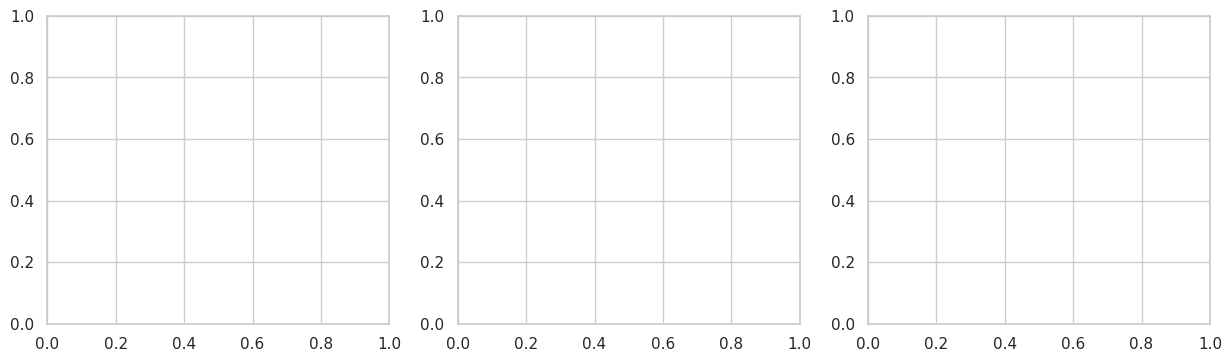

In [71]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(Y_test, lr_pred, labels=['negative', 'positive'])
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[0].set_title('Logistic Regression', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('Actual', fontsize=11)

# Random Forest Confusion Matrix
cm_rf = confusion_matrix(Y_test, rf_pred, labels=['negative', 'positive'])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[1].set_title('Random Forest', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('Actual', fontsize=11)

# XGBoost Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_pred, labels=[0, 1])
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[2],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[2].set_title('XGBoost', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Predicted', fontsize=11)
axes[2].set_ylabel('Actual', fontsize=11)

plt.suptitle('Confusion Matrices - Misclassification Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 3. Confusion Matrix Heatmaps: Misclassification Analysis

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Logistic Regression ROC
fpr_lr, tpr_lr, _ = roc_curve(Y_test_binary, lr_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')

# Random Forest ROC
fpr_rf, tpr_rf, _ = roc_curve(Y_test_binary, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')

# XGBoost ROC
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Discrimination Ability', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 2. ROC Curve: Discrimination Ability Comparison

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Collect metrics for all three models
metrics_data = []

# Logistic Regression
lr_pred = logreg.predict(X_test)
lr_proba = logreg.predict_proba(X_test)[:, 1]
Y_test_binary = Y_test.map({'negative': 0, 'positive': 1})
metrics_data.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(Y_test, lr_pred),
    "F1": f1_score(Y_test, lr_pred, pos_label='positive'),
    "AUC": roc_auc_score(Y_test_binary, lr_proba)
})

# Random Forest
rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
metrics_data.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(Y_test, rf_pred),
    "F1": f1_score(Y_test, rf_pred, pos_label='positive'),
    "AUC": roc_auc_score(Y_test_binary, rf_proba)
})

# XGBoost
xgb_pred = xgb_model.predict(x_test)
xgb_proba = xgb_model.predict_proba(x_test)[:, 1]
metrics_data.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "F1": f1_score(y_test, xgb_pred),
    "AUC": roc_auc_score(y_test, xgb_proba)
})

# Create DataFrame and plot
metrics_df = pd.DataFrame(metrics_data)
melted = metrics_df.melt(id_vars="Model", value_vars=["Accuracy", "F1", "AUC"],
                         var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted, x="Model", y="Score", hue="Metric")
plt.ylim(0, 1.0)
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

print("\nModel Metrics Summary:")
print(metrics_df.to_string(index=False))

# Heart Attack Prediction Model

This notebook demonstrates the development of machine learning models to predict heart attack likelihood based on medical data.

## Setup and Installation

Install required dependencies:

In [ ]:
%pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.9/115.9 MB 36.9 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.8/296.8 MB 35.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [xgboost]m1/2 [xgboost]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Data Loading

Download and load the heart attack dataset from Kaggle:

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid")

print("Path to dataset files:", path)

Path to dataset files: /home/codespace/.cache/kagglehub/datasets/fatemehmohammadinia/heart-attack-dataset-tarik-a-rashid/versions/1


In [ ]:
import pandas as pd

## Data Exploration

Explore the dataset to understand its structure and contents:

In [ ]:
# Load the dataset
data = pd.read_csv(f"{path}/Medicaldataset.csv")
data.head()

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1319 non-null   int64  
 1   Gender                    1319 non-null   int64  
 2   Heart rate                1319 non-null   int64  
 3   Systolic blood pressure   1319 non-null   int64  
 4   Diastolic blood pressure  1319 non-null   int64  
 5   Blood sugar               1319 non-null   float64
 6   CK-MB                     1319 non-null   float64
 7   Troponin                  1319 non-null   float64
 8   Result                    1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
import seaborn as sns

## Data Visualization

Visualize relationships between features using pair plots:

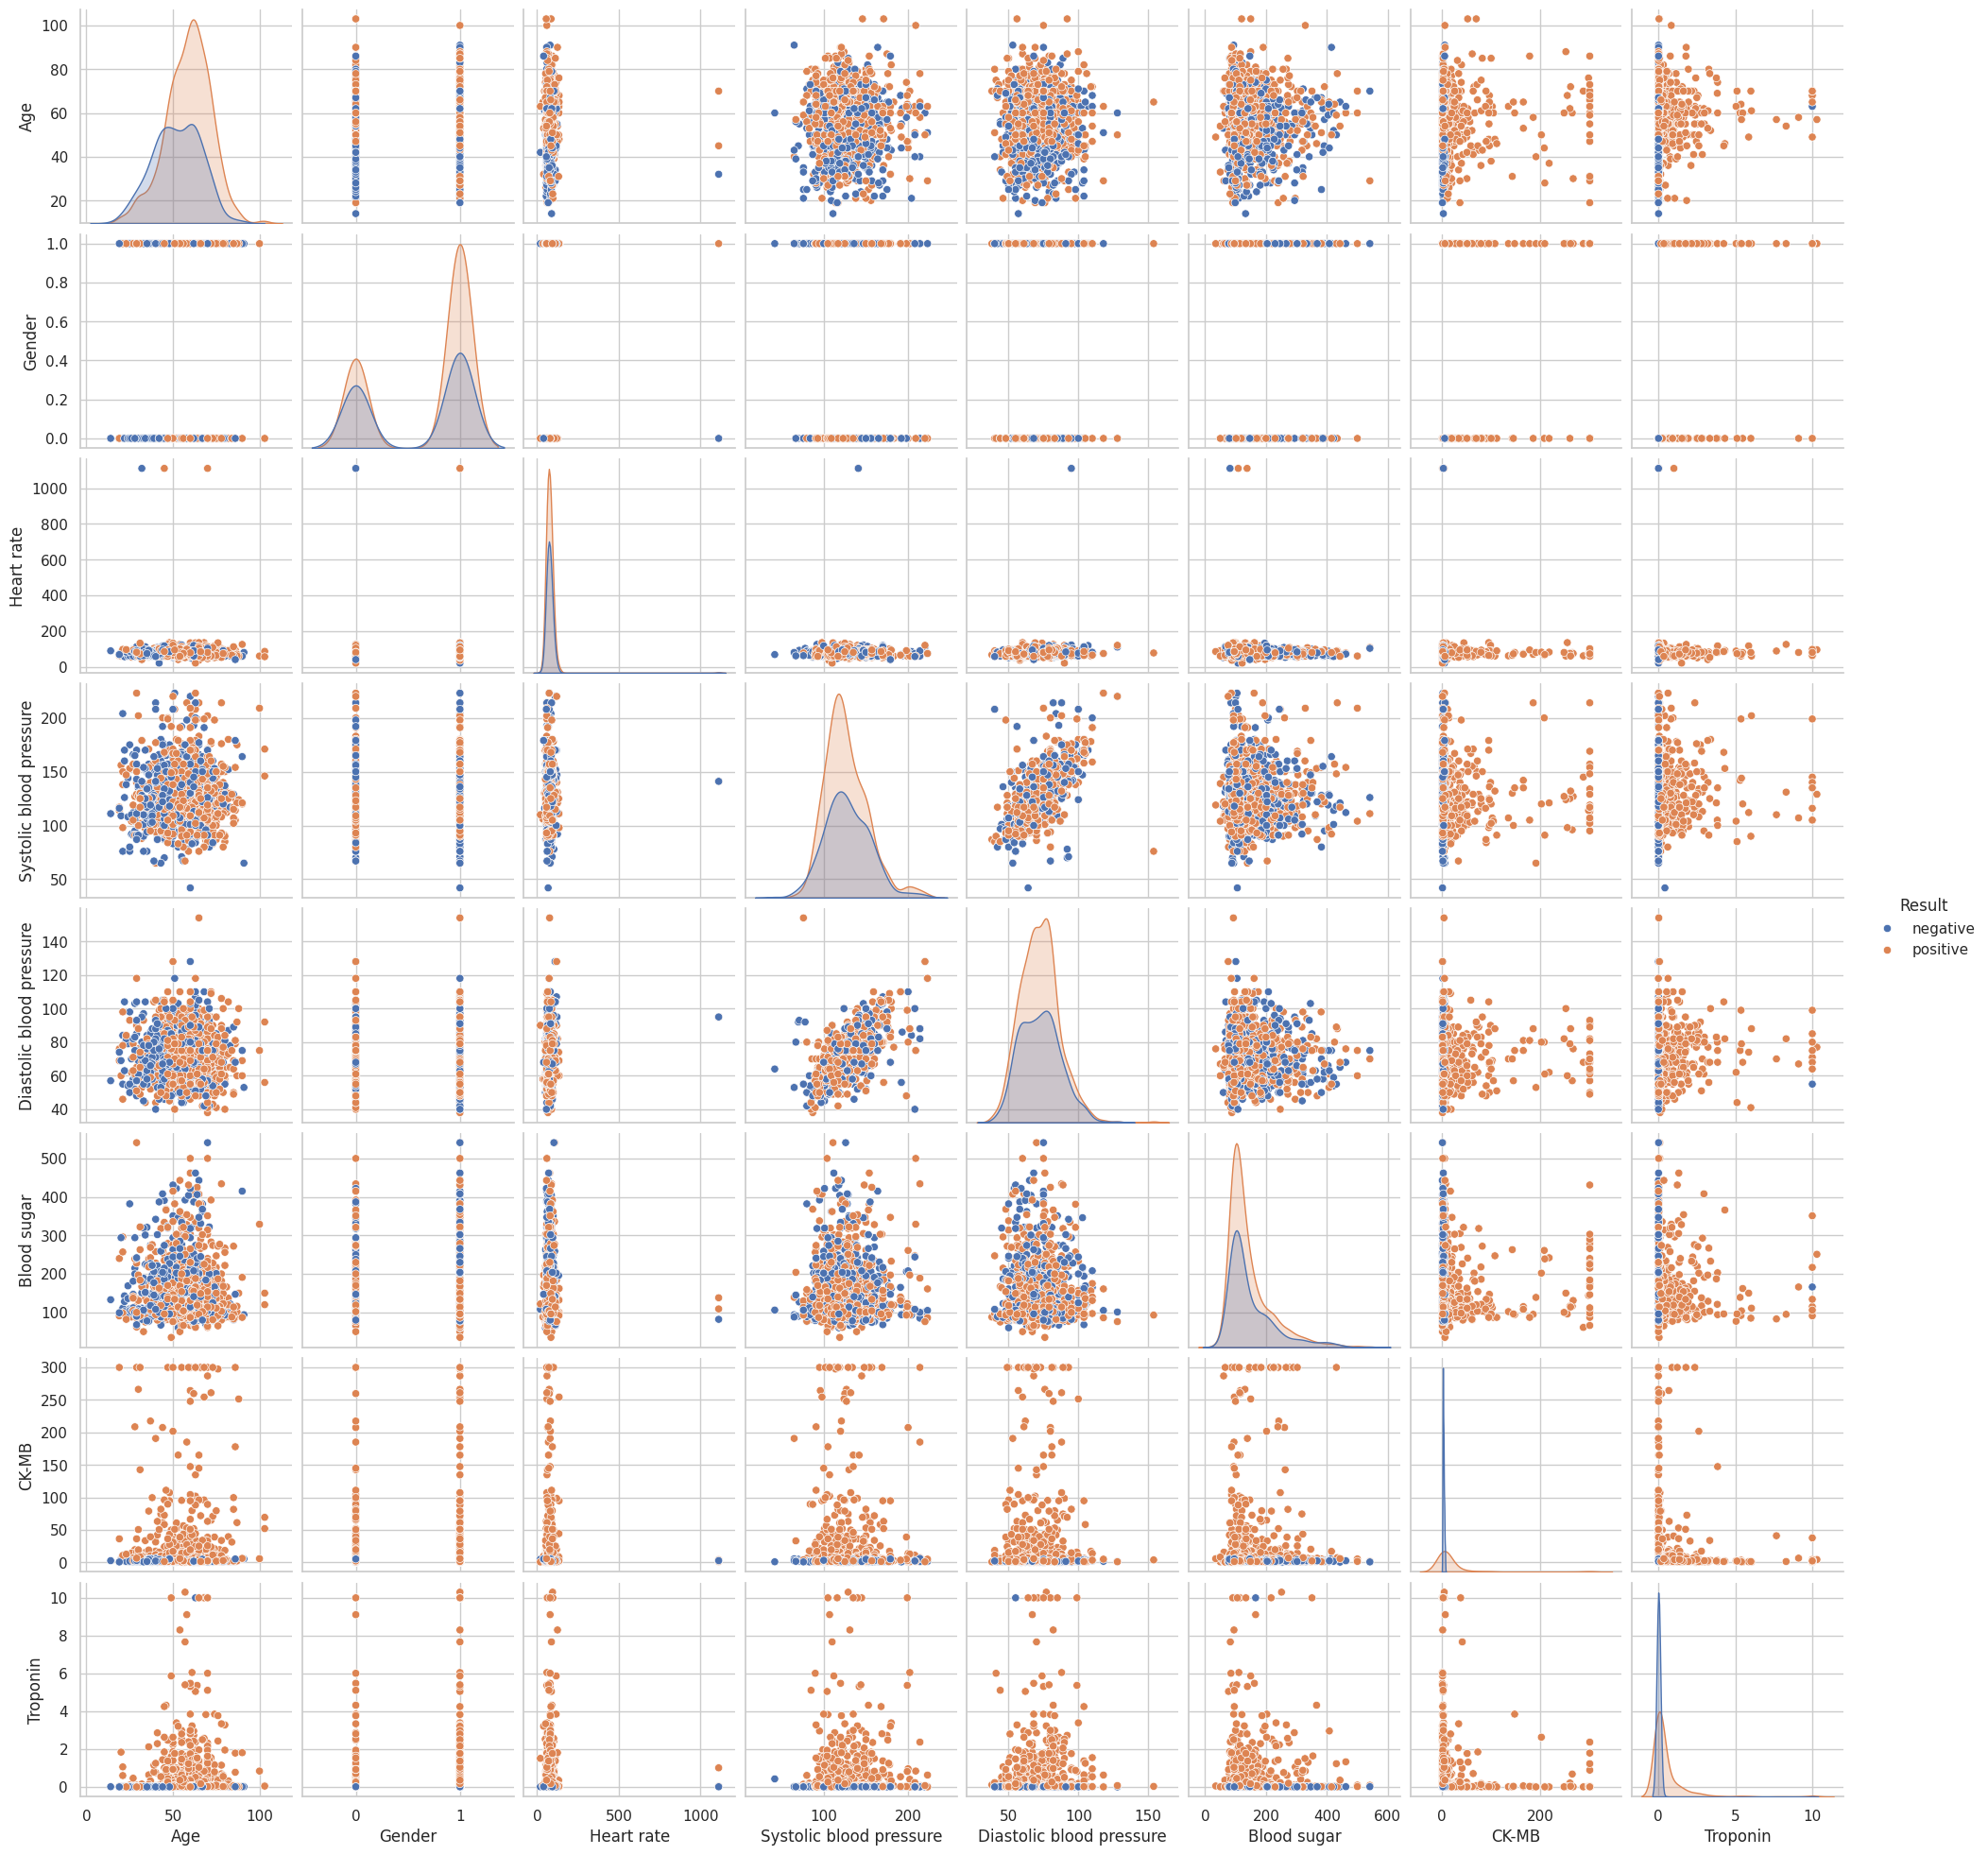

In [ ]:
sns.pairplot(data.dropna(),hue='Result')


## Data Preparation

Split the data and prepare features for model training:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, Y = train_test_split(df, test_size=.25, random_state=42, shuffle=True)

In [ ]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (989, 9)
Y shape: (330, 9)


In [ ]:
independent_cols = ['Age', 'Gender','Heart rate', 'Systolic blood pressure','Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin']
dependent_col = 'Result'

In [ ]:
X_train = X[independent_cols]
Y_train = X[dependent_col]
X_test = Y[independent_cols]
Y_test = Y[dependent_col]

In [ ]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (989, 8)
Y_train shape: (989,)
X_test shape: (330, 8)
Y_test shape: (330,)


## Model 1: Logistic Regression

Train and evaluate a Logistic Regression model:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
print("Accuracy of Logistic Regression model:", accuracy_score(Y_test, logreg.predict(X_test)))

Accuracy of Logistic Regression model: 0.7787878787878788


In [ ]:
confusion_matrix(Y_test, logreg.predict(X_test))

array([[ 86,  42],
       [ 31, 171]])

In [ ]:
print(classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.74      0.67      0.70       128
    positive       0.80      0.85      0.82       202

    accuracy                           0.78       330
   macro avg       0.77      0.76      0.76       330
weighted avg       0.78      0.78      0.78       330



## Model 2: Random Forest Classifier

Train and evaluate a Random Forest model:

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
print("Accuracy of Random Forest model:", accuracy_score(Y_test, rf_model.predict(X_test)))

Accuracy of Random Forest model: 0.9757575757575757


In [ ]:
confusion_matrix(Y_test, rf_model.predict(X_test))

array([[123,   5],
       [  3, 199]])

In [ ]:
print(classification_report(Y_test, rf_model.predict(X_test)))

              precision    recall  f1-score   support

    negative       0.98      0.96      0.97       128
    positive       0.98      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330



## Model 3: XGBoost 
Train and evaluate a is XGBoost model:

In [ ]:
# Convert categorical dependent variable to numerical
df[dependent_col] = df[dependent_col].map({'positive':1,'negative':0})
print(df.head)

<bound method NDFrame.head of       Age  Gender  Heart rate  Systolic blood pressure  \
0      64       1          66                      160   
1      21       1          94                       98   
2      55       1          64                      160   
3      64       1          70                      120   
4      55       1          64                      112   
...   ...     ...         ...                      ...   
1314   44       1          94                      122   
1315   66       1          84                      125   
1316   45       1          85                      168   
1317   54       1          58                      117   
1318   51       1          94                      157   

      Diastolic blood pressure  Blood sugar  CK-MB  Troponin  Result  
0                           83        160.0   1.80     0.012       0  
1                           46        296.0   6.75     1.060       1  
2                           77        270.0   1.99     0.003

In [ ]:
x, y = train_test_split(df, test_size=.25, random_state=42, shuffle=True)
x_train = x[independent_cols]
y_train = x[dependent_col]
x_test = y[independent_cols]
y_test = y[dependent_col]

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)
xgb_model.fit(x_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [ ]:
print("Accuracy of model", accuracy_score(y_test, xgb_model.predict(x_test)))

Accuracy of model 0.9757575757575757


In [ ]:
print(confusion_matrix(y_test, xgb_model.predict(x_test)))

[[123   5]
 [  3 199]]


In [ ]:
print(classification_report(y_test, xgb_model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       128
           1       0.98      0.99      0.98       202

    accuracy                           0.98       330
   macro avg       0.98      0.97      0.97       330
weighted avg       0.98      0.98      0.98       330



## Model Persistence

Save and load the Random Forest model:

In [ ]:
# Save the models
import joblib
joblib.dump(rf_model, 'heart_attack_rf_model.pkl')
joblib.dump(logreg, 'heart_attack_logreg_model.pkl')
joblib.dump(xgb_model, 'heart_attack_xgb_model.pkl')

['heart_attack_xgb_model.pkl']

In [ ]:
# Load the saved model
loaded_logreg_model = joblib.load('heart_attack_logreg_model.pkl')
loaded_rf_model = joblib.load('heart_attack_rf_model.pkl')

In [ ]:
# Test the loaded model
print("Loaded Logistic Regression model accuracy:", accuracy_score(Y_test, loaded_logreg_model.predict(X_test)))
print("Loaded Random Forest model accuracy:", accuracy_score(Y_test, loaded_rf_model.predict(X_test)))
print("Loaded XGBoost model accuracy:", accuracy_score(y_test, xgb_model.predict(x_test)))

Loaded Logistic Regression model accuracy: 0.7787878787878788
Loaded Random Forest model accuracy: 0.9757575757575757
Loaded XGBoost model accuracy: 0.9757575757575757


## Model Comparison Visualizations

### 1. Bar Chart: Quick Metric Comparison

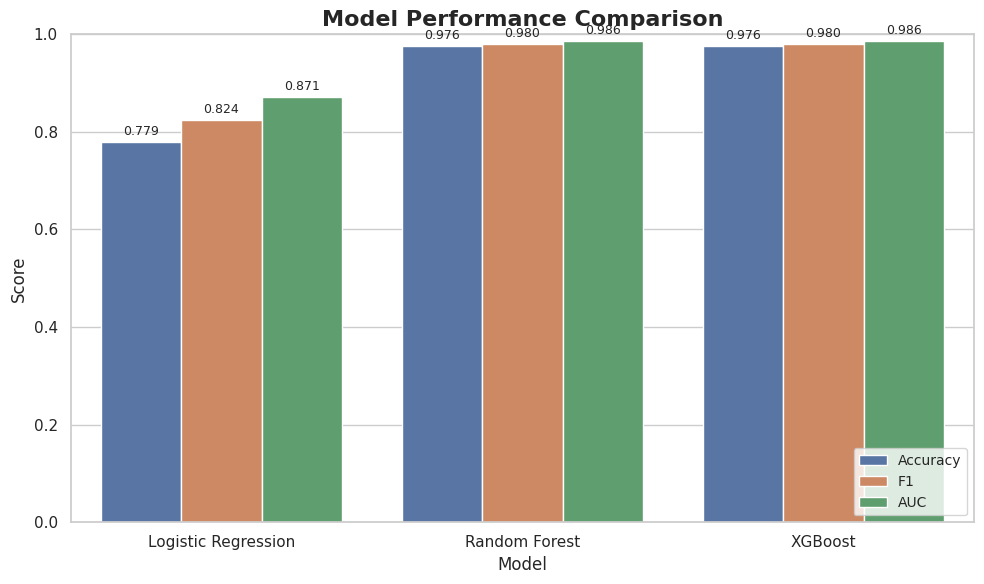


Model Metrics Summary:
              Model  Accuracy       F1      AUC
Logistic Regression  0.778788 0.824096 0.871113
      Random Forest  0.975758 0.980296 0.986425
            XGBoost  0.975758 0.980296 0.985574


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score


metrics_data = []


lr_pred = logreg.predict(X_test)
lr_proba = logreg.predict_proba(X_test)[:, 1]
Y_test_binary = Y_test.map({'negative': 0, 'positive': 1})
metrics_data.append({
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(Y_test, lr_pred),
    "F1": f1_score(Y_test, lr_pred, pos_label='positive'),
    "AUC": roc_auc_score(Y_test_binary, lr_proba)
})


rf_pred = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]
metrics_data.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(Y_test, rf_pred),
    "F1": f1_score(Y_test, rf_pred, pos_label='positive'),
    "AUC": roc_auc_score(Y_test_binary, rf_proba)
})


xgb_pred = xgb_model.predict(x_test)
xgb_proba = xgb_model.predict_proba(x_test)[:, 1]
metrics_data.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, xgb_pred),
    "F1": f1_score(y_test, xgb_pred),
    "AUC": roc_auc_score(y_test, xgb_proba)
})


metrics_df = pd.DataFrame(metrics_data)
melted = metrics_df.melt(id_vars="Model", value_vars=["Accuracy", "F1", "AUC"],
                         var_name="Metric", value_name="Score")

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=melted, x="Model", y="Score", hue="Metric")
plt.ylim(0, 1.0)
plt.title("Model Performance Comparison", fontsize=16, fontweight='bold')
plt.ylabel("Score", fontsize=12)
plt.xlabel("Model", fontsize=12)


for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', padding=3, fontsize=9)

plt.legend(loc="lower right", fontsize=10)
plt.tight_layout()
plt.show()

print("\nModel Metrics Summary:")
print(metrics_df.to_string(index=False))

### 2. ROC Curve: Discrimination Ability Comparison

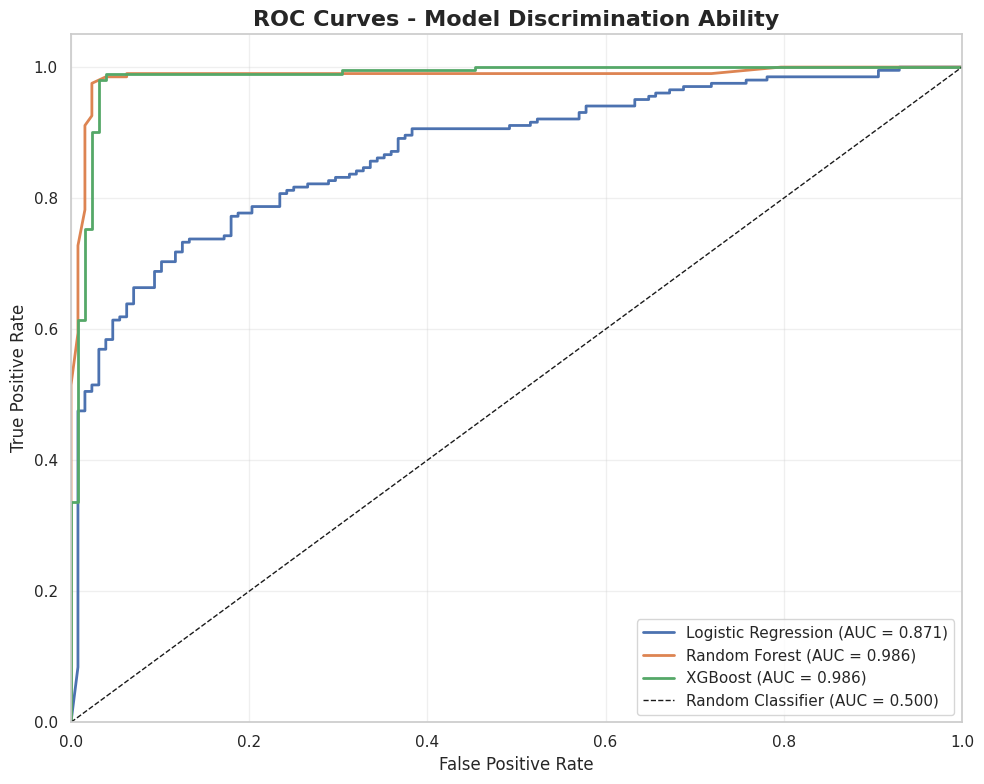

In [ ]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))


fpr_lr, tpr_lr, _ = roc_curve(Y_test_binary, lr_proba)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')


fpr_rf, tpr_rf, _ = roc_curve(Y_test_binary, rf_proba)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.plot(fpr_rf, tpr_rf, lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')


fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_proba)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
plt.plot(fpr_xgb, tpr_xgb, lw=2, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')


plt.plot([0, 1], [0, 1], 'k--', lw=1, label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Model Discrimination Ability', fontsize=16, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### 3. Confusion Matrix Heatmaps: Misclassification Analysis

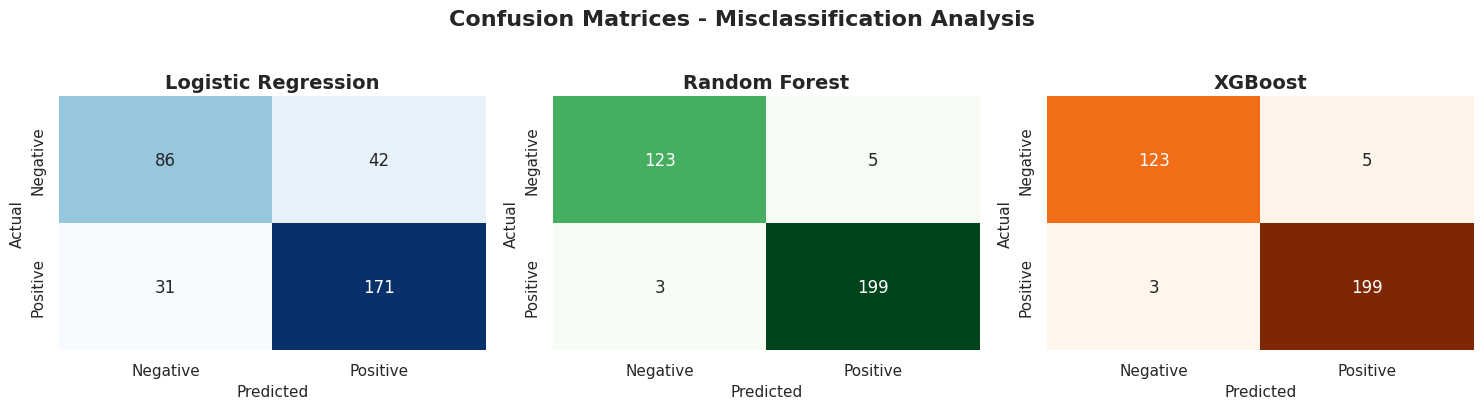

In [ ]:
from sklearn.metrics import confusion_matrix

fig, axes = plt.subplots(1, 3, figsize=(15, 4))


cm_lr = confusion_matrix(Y_test, lr_pred, labels=['negative', 'positive'])
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[0].set_title('Logistic Regression', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Predicted', fontsize=11)
axes[0].set_ylabel('Actual', fontsize=11)


cm_rf = confusion_matrix(Y_test, rf_pred, labels=['negative', 'positive'])
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', cbar=False, ax=axes[1],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[1].set_title('Random Forest', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Predicted', fontsize=11)
axes[1].set_ylabel('Actual', fontsize=11)


cm_xgb = confusion_matrix(y_test, xgb_pred, labels=[0, 1])
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', cbar=False, ax=axes[2],
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
axes[2].set_title('XGBoost', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Predicted', fontsize=11)
axes[2].set_ylabel('Actual', fontsize=11)

plt.suptitle('Confusion Matrices - Misclassification Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 4. Feature Importance: Model Behavior Interpretation

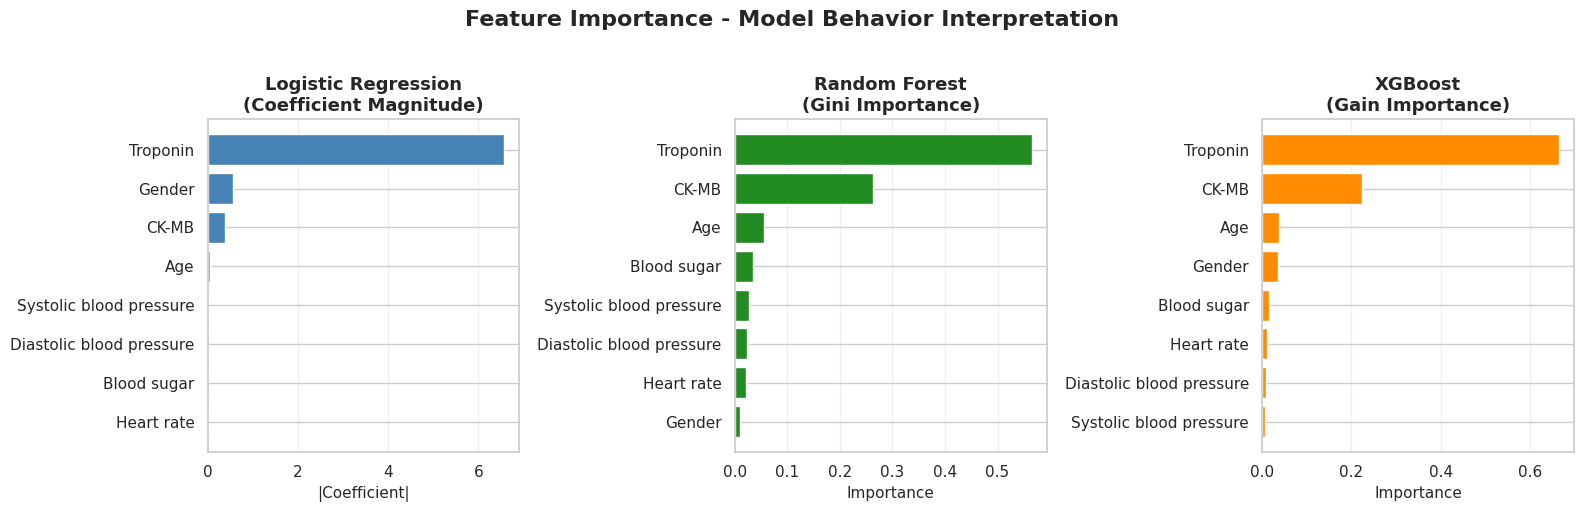


Top 3 Most Important Features:

Logistic Regression:
 Feature  Importance
   CK-MB    0.381692
  Gender    0.557021
Troponin    6.580996

Random Forest:
 Feature  Importance
     Age    0.056320
   CK-MB    0.262993
Troponin    0.565233

XGBoost:
 Feature  Importance
     Age    0.037320
   CK-MB    0.223144
Troponin    0.665440


In [ ]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(16, 5))


lr_coef = np.abs(logreg.coef_[0])
lr_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': lr_coef
}).sort_values('Importance', ascending=True)

axes[0].barh(lr_importance['Feature'], lr_importance['Importance'], color='steelblue')
axes[0].set_title('Logistic Regression\n(Coefficient Magnitude)', fontsize=13, fontweight='bold')
axes[0].set_xlabel('|Coefficient|', fontsize=11)
axes[0].grid(axis='x', alpha=0.3)


rf_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1].barh(rf_importance['Feature'], rf_importance['Importance'], color='forestgreen')
axes[1].set_title('Random Forest\n(Gini Importance)', fontsize=13, fontweight='bold')
axes[1].set_xlabel('Importance', fontsize=11)
axes[1].grid(axis='x', alpha=0.3)


xgb_importance = pd.DataFrame({
    'Feature': independent_cols,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[2].barh(xgb_importance['Feature'], xgb_importance['Importance'], color='darkorange')
axes[2].set_title('XGBoost\n(Gain Importance)', fontsize=13, fontweight='bold')
axes[2].set_xlabel('Importance', fontsize=11)
axes[2].grid(axis='x', alpha=0.3)

plt.suptitle('Feature Importance - Model Behavior Interpretation', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


print("\nTop 3 Most Important Features:\n")
print("Logistic Regression:")
print(lr_importance.tail(3).to_string(index=False))
print("\nRandom Forest:")
print(rf_importance.tail(3).to_string(index=False))
print("\nXGBoost:")
print(xgb_importance.tail(3).to_string(index=False))